# Car Auction Data Visualization 

## loading dataset

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_visualization.csv")

In [3]:
df.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2014,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500
1,2014,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500
2,2015,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000
3,2015,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750
4,2014,Nissan,Altima,2.5 S,Sedan,automatic,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350,10900


In [4]:
df.shape

(536405, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536405 entries, 0 to 536404
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          536405 non-null  int64  
 1   make          536405 non-null  object 
 2   model         536405 non-null  object 
 3   trim          536405 non-null  object 
 4   body          536405 non-null  object 
 5   transmission  536405 non-null  object 
 6   state         536405 non-null  object 
 7   condition     536405 non-null  float64
 8   odometer      536405 non-null  float64
 9   color         536405 non-null  object 
 10  interior      536405 non-null  object 
 11  seller        536405 non-null  object 
 12  mmr           536405 non-null  int64  
 13  sellingprice  536405 non-null  int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 57.3+ MB


## Data Visualization

C:\Users\Shiva\AppData\Local\Temp\ipykernel_5364\3601246606.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sellingprice_range', data=df, palette='Blues', order=selling_price_labels)


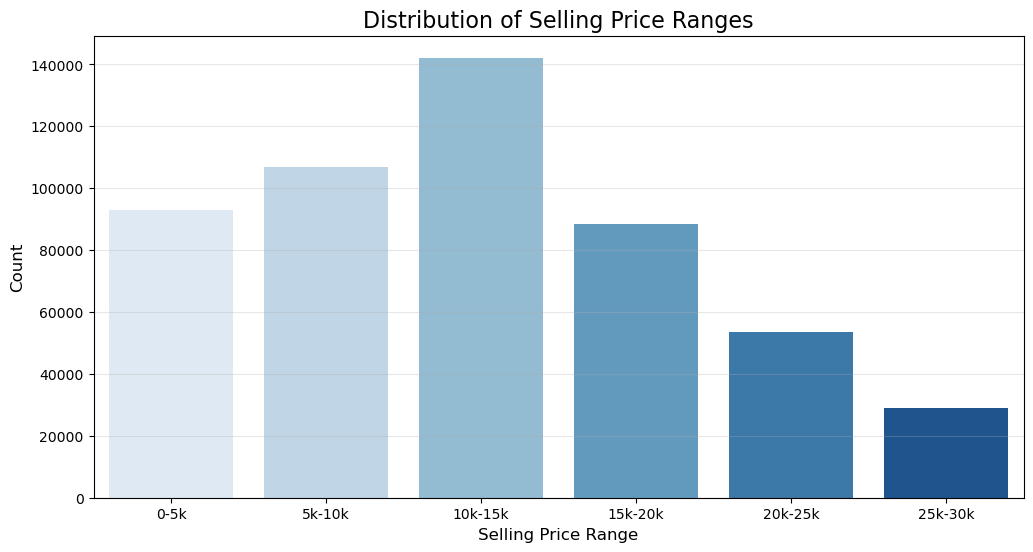

C:\Users\Shiva\AppData\Local\Temp\ipykernel_5364\3601246606.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='condition_range', data=df, palette='Greens', order=condition_labels)


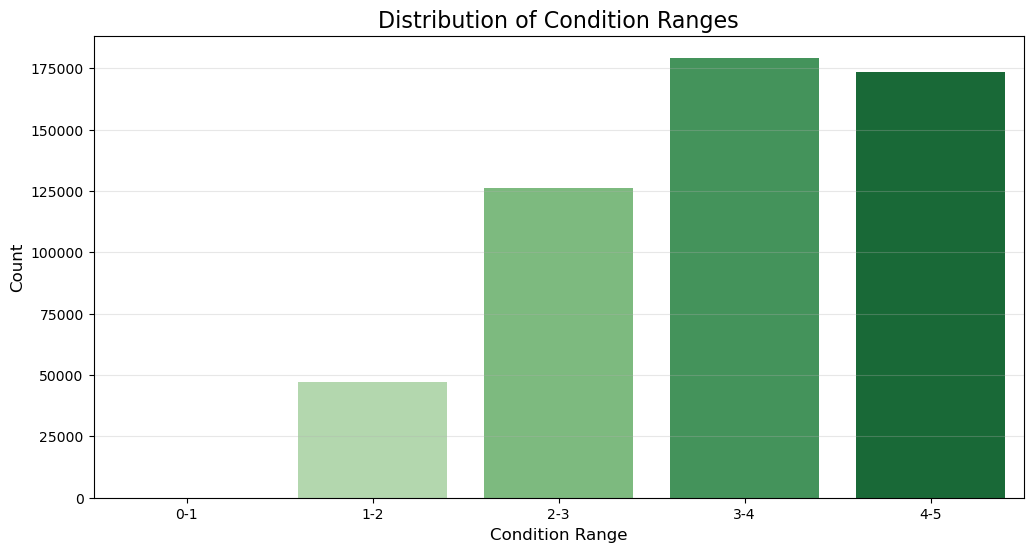

In [6]:
selling_price_bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]
selling_price_labels = ["0-5k", "5k-10k", "10k-15k", "15k-20k", "20k-25k", "25k-30k"]

condition_bins = [0, 1, 2, 3, 4, 5]
condition_labels = ["0-1", "1-2", "2-3", "3-4", "4-5"]

df['sellingprice_range'] = pd.cut(df['sellingprice'], bins=selling_price_bins, labels=selling_price_labels, right=False)
df['condition_range'] = pd.cut(df['condition'], bins=condition_bins, labels=condition_labels, right=False)

# Plotting Selling Price Range Histogram
plt.figure(figsize=(12, 6))
sns.countplot(x='sellingprice_range', data=df, palette='Blues', order=selling_price_labels)
plt.title('Distribution of Selling Price Ranges', fontsize=16)
plt.xlabel('Selling Price Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Plotting Condition Range Histogram
plt.figure(figsize=(12, 6))
sns.countplot(x='condition_range', data=df, palette='Greens', order=condition_labels)
plt.title('Distribution of Condition Ranges', fontsize=16)
plt.xlabel('Condition Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

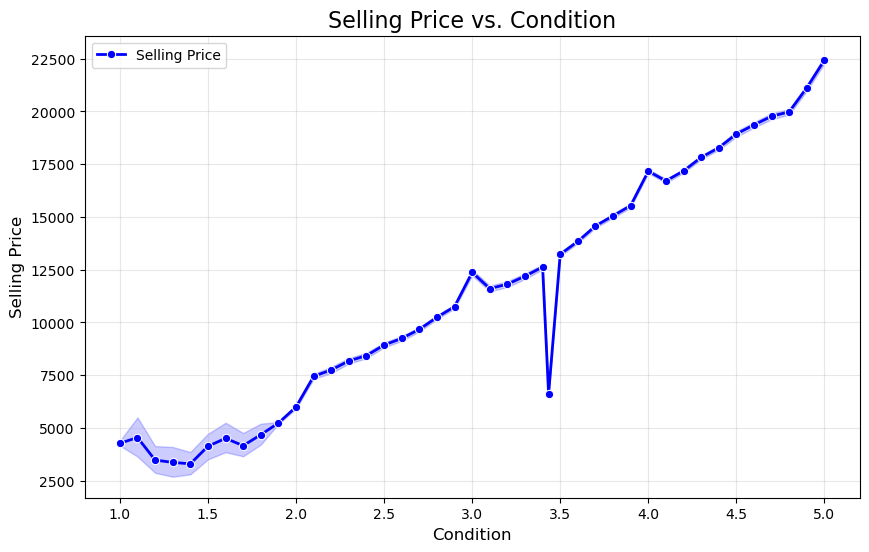

In [7]:
# Plotting Selling Price vs. Condition as a Line Graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='condition', y='sellingprice', data=df, color='blue', marker='o', linewidth=2, label='Selling Price')

plt.title('Selling Price vs. Condition', fontsize=16)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

C:\Users\Shiva\AppData\Local\Temp\ipykernel_5364\2783803170.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='make_model', data=make_model_counts.head(10), palette='viridis')


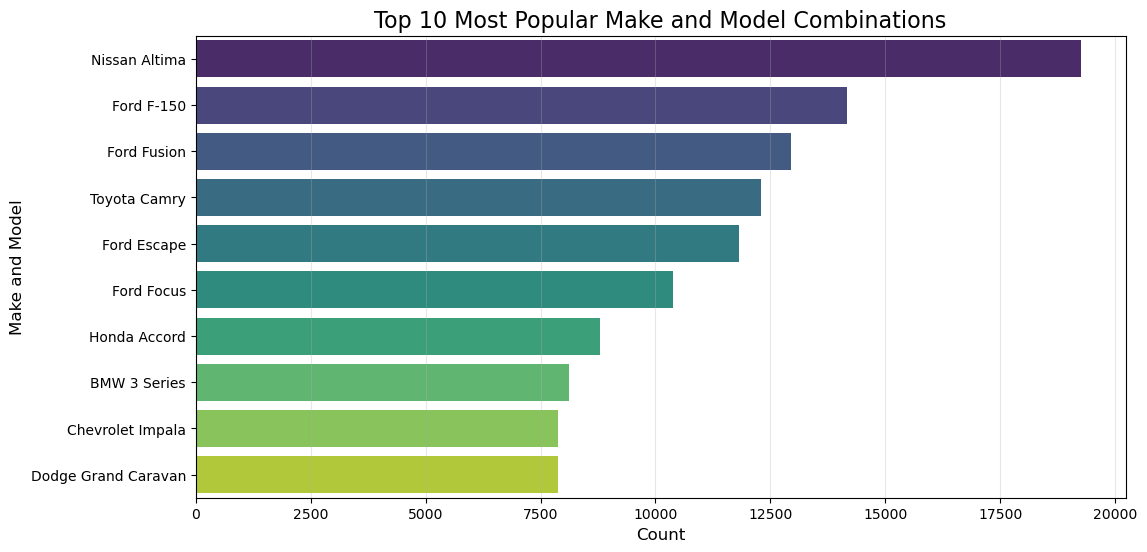

In [8]:
df['make_model'] = df['make'] + " " + df['model']

make_model_counts = df['make_model'].value_counts().reset_index()
make_model_counts.columns = ['make_model', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='make_model', data=make_model_counts.head(10), palette='viridis')
plt.title('Top 10 Most Popular Make and Model Combinations', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Make and Model', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.show()

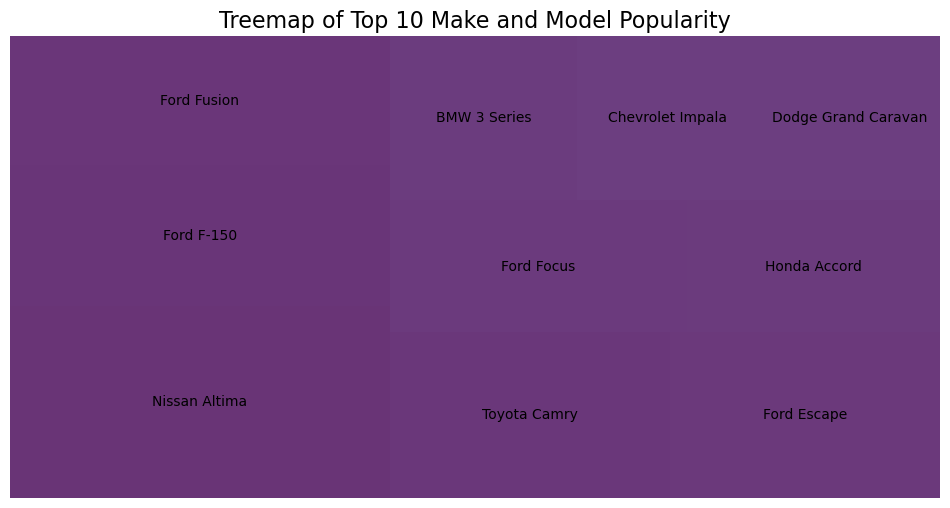

In [9]:
# Treemap plot for top 10 make-model combinations

import squarify 

plt.figure(figsize=(12, 6))
squarify.plot(
    sizes=make_model_counts['count'].head(10), 
    label=make_model_counts['make_model'].head(10), 
    alpha=0.8, 
    color=plt.cm.viridis(range(10))
)
plt.title('Treemap of Top 10 Make and Model Popularity', fontsize=16)
plt.axis('off')
plt.show()

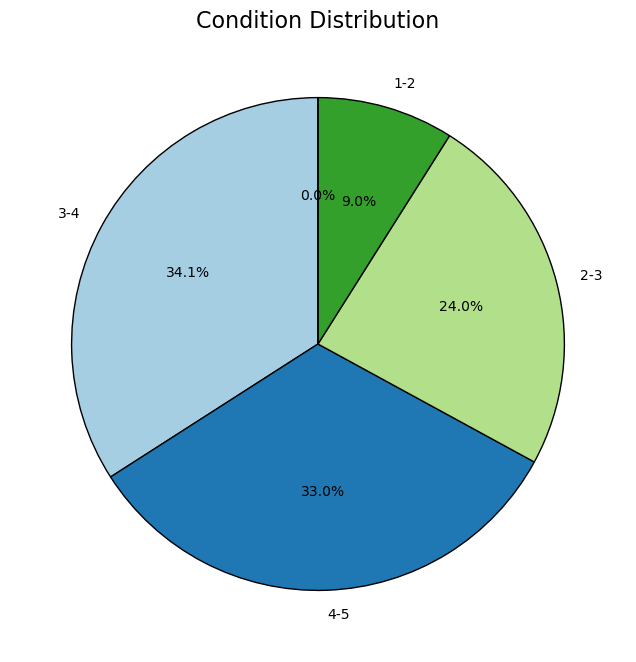

In [10]:
condition_bins = [0, 1, 2, 3, 4, 5]
condition_labels = ["0-1", "1-2", "2-3", "3-4", "4-5"]
df['condition_range'] = pd.cut(df['condition'], bins=condition_bins, labels=condition_labels, right=False)

condition_counts = df['condition_range'].value_counts()

plt.figure(figsize=(8, 8))
condition_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Condition Distribution', fontsize=16)
plt.ylabel('') 
plt.show()

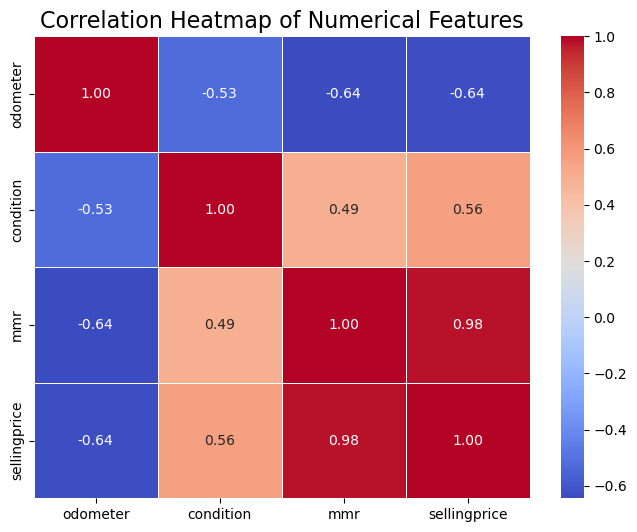

In [11]:
numerical_features = ['odometer', 'condition', 'mmr', 'sellingprice']
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

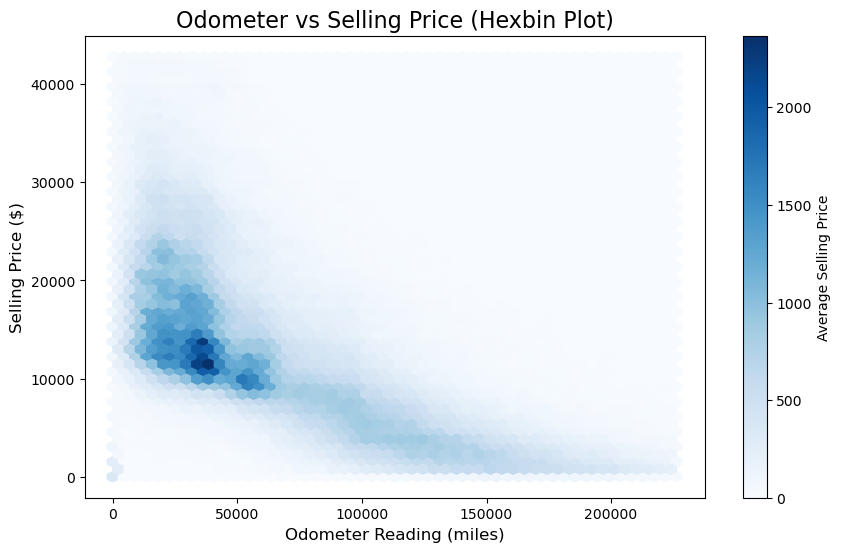

In [14]:
plt.figure(figsize=(10, 6))

plt.hexbin(df['odometer'], df['sellingprice'], gridsize=50, cmap='Blues', reduce_C_function=np.mean)

plt.colorbar(label='Average Selling Price')
plt.title('Odometer vs Selling Price (Hexbin Plot)', fontsize=16)
plt.xlabel('Odometer Reading (miles)', fontsize=12)
plt.ylabel('Selling Price ($)', fontsize=12)
plt.show()

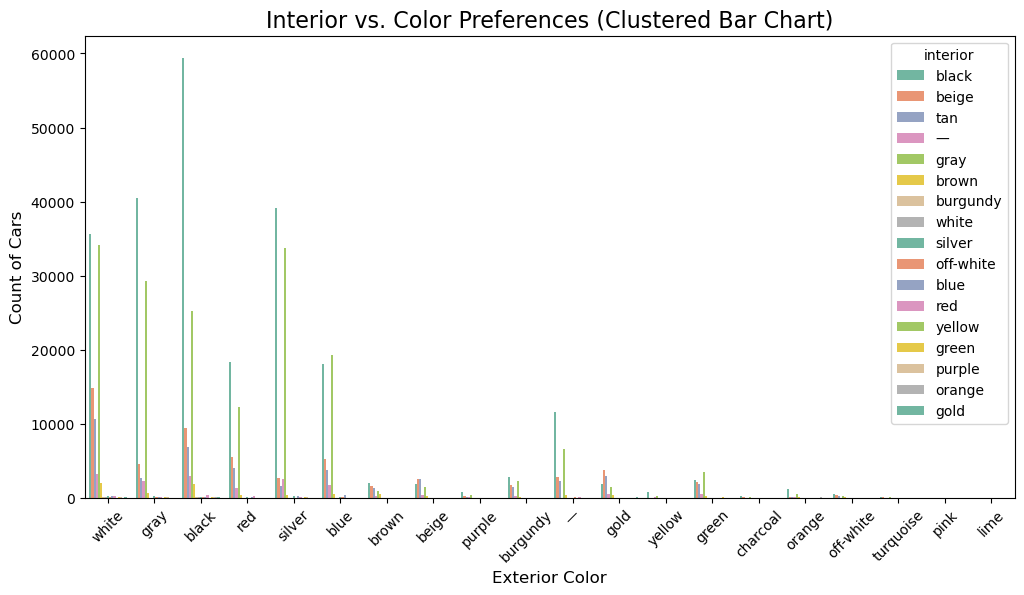

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='color', hue='interior', data=df, palette='Set2')

plt.title('Interior vs. Color Preferences (Clustered Bar Chart)', fontsize=16)
plt.xlabel('Exterior Color', fontsize=12)
plt.ylabel('Count of Cars', fontsize=12)
plt.xticks(rotation=45)
plt.show()

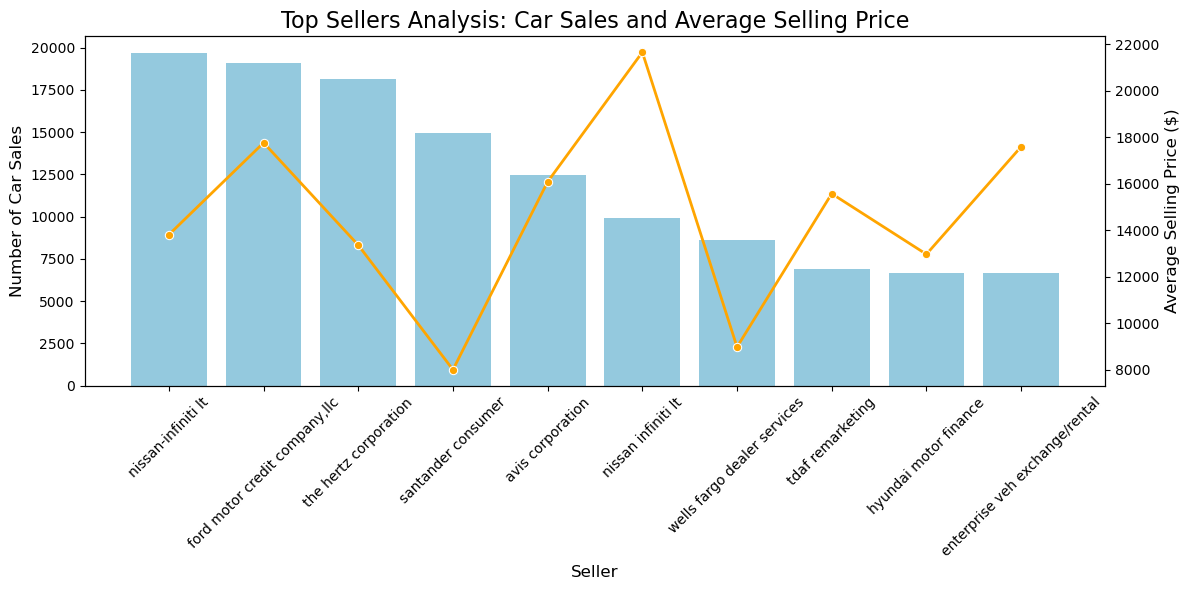

In [16]:
seller_sales = df.groupby('seller').agg(
    car_sales=('seller', 'size'),
    avg_sellingprice=('sellingprice', 'mean')
).reset_index()

top_sellers = seller_sales.sort_values(by='car_sales', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x='seller', y='car_sales', data=top_sellers, ax=ax1, color='skyblue')
ax1.set_xlabel('Seller', fontsize=12)
ax1.set_ylabel('Number of Car Sales', fontsize=12)
ax1.set_title('Top Sellers Analysis: Car Sales and Average Selling Price', fontsize=16)
ax1.tick_params(axis='x', rotation=45) 

ax2 = ax1.twinx()
sns.lineplot(x='seller', y='avg_sellingprice', data=top_sellers, ax=ax2, color='orange', marker='o', linewidth=2)
ax2.set_ylabel('Average Selling Price ($)', fontsize=12)

plt.tight_layout()
plt.show()

In [17]:
%pip install dash pandas plotly

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------- ------------------------------- 1.6/7.8 MB 10.5 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.8 MB 15.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 15.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
#dashboard for dv

import dash
from dash import dcc, html
import plotly.express as px

app = dash.Dash(__name__)

make_options = [{'label': make, 'value': make} for make in df['make'].unique()]
model_options = [{'label': model, 'value': model} for model in df['model'].unique()]
state_options = [{'label': state, 'value': state} for state in df['state'].unique()]
condition_options = [{'label': f"{i}-{i+1}", 'value': i} for i in range(0, 5)]

# App layout with interactive elements
app.layout = html.Div([
    html.H1("Interactive Dashboard for Auction Car Analysis", style={'textAlign': 'center'}),

    # Dropdowns for filtering
    html.Div([
        dcc.Dropdown(
            id='make-dropdown',
            options=make_options,
            value=make_options[0]['value'],
            multi=False,
            placeholder="Select Make"
        ),
        dcc.Dropdown(
            id='model-dropdown',
            options=model_options,
            value=model_options[0]['value'],
            multi=False,
            placeholder="Select Model"
        ),
        dcc.Dropdown(
            id='state-dropdown',
            options=state_options,
            value=state_options[0]['value'],
            multi=False,
            placeholder="Select State"
        ),
        dcc.Dropdown(
            id='condition-dropdown',
            options=condition_options,
            value=0,
            multi=False,
            placeholder="Select Condition"
        ),
    ], style={'width': '50%', 'margin': 'auto'}),

    html.Div([
        dcc.Graph(id='car-sales-graph')
    ])
])

# Callback to update the graph based on filter criteria
@app.callback(
    dash.dependencies.Output('car-sales-graph', 'figure'),
    [
        dash.dependencies.Input('make-dropdown', 'value'),
        dash.dependencies.Input('model-dropdown', 'value'),
        dash.dependencies.Input('state-dropdown', 'value'),
        dash.dependencies.Input('condition-dropdown', 'value')
    ]
)
def update_graph(make, model, state, condition):

    filtered_df = df[
        (df['make'] == make) & 
        (df['model'] == model) & 
        (df['state'] == state) & 
        (df['condition'] >= condition)  
    ]
    
    fig = px.scatter(filtered_df, x='odometer', y='sellingprice', color='condition', 
                     title=f"Car Sales: {make} {model} in {state} with Condition {condition} or higher",
                     labels={'odometer': 'Odometer (miles)', 'sellingprice': 'Selling Price ($)', 'condition': 'Condition'},
                     hover_data=['make', 'model', 'state'])
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)
